In [2]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv("merged_data.csv")

In [26]:
c = df.dropna(subset=["Budget_y"])
c[c["Budget_y"] != 0]

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Running Time,Genres,Title_x,MPAA,Domestic Distributor,Domestic Opening,Earliest Release Date,...,Revenue_y,Runtime,Title_y,movie_id,cast_ids,order,director_ids,domestic_revenue,international_revenue,worldwide_revenue
1,1,37987,37987,1 hr 20 min,Drama Mystery Thriller,Blind Turn (2012),NaN,NaN,NaN,NaN,...,0.0,76.0,Blind Turn,75594,"[96624, 575673, 238354, 575674, 575675, 575676...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]",[2670890],NaN,NaN,NaN
8,8,41420,41420,1 hr 49 min,Action Crime Drama Mystery Thriller,Broken City (2013),R,Twentieth Century Fox,8268908.0,"January 18, 2013 (Domestic, EMEA)",...,34737199.0,109.0,Broken City,98357,"[13240, 934, 1922, 2954, 12834, 203096, 76511,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[11448],19701164.0,15036035.0,34737199.0
40,40,41452,41452,1 hr 55 min,Drama,Watercolor Postcards (2013),PG-13,NaN,NaN,NaN,...,0.0,115.0,Watercolor Postcards,295196,"[54479, 56523, 135353, 11885, 783, 101947, 644...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[1513798],NaN,NaN,NaN
82,82,41494,41494,1 hr 29 min,Action Adventure Comedy Horror Sci-Fi Thriller,Spiders (2013),PG-13,Millennium Entertainment,NaN,"February 8, 2013 (Domestic)",...,257019.0,89.0,Spiders,164331,"[115440, 85178, 24605, 41687, 85516, 10207, 13...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[42309],257019.0,257019.0,NaN
96,96,41508,41508,10 min,Short,Greifensee (2013),NaN,NaN,NaN,NaN,...,0.0,10.0,Greifensee,295510,"[1077769, 1368701, 1368702]","[0, 1, 2]",[1064108],NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35062,35062,76835,76835,1 hr 20 min,Horror,Zombie Rage (2023),NaN,NaN,NaN,NaN,...,0.0,80.0,Zombie Rage,1179165,"[2917401, 3690975, 1465336, 2909545, 3539488]","[0, 1, 2, 3, 4]",[3539488],NaN,NaN,NaN
35067,35067,76840,76840,23 min,Drama Short,Gridlock (2023),NaN,NaN,NaN,NaN,...,0.0,23.0,Gridlock,1146697,"[4140316, 4140318, 4140321, 4140322, 4148196, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[4140324],NaN,NaN,NaN
35068,35068,76841,76841,1 hr 43 min,Comedy Romance,No Hard Feelings (2023),R,Sony Pictures Entertainment (SPE),15002770.0,"June 21, 2023 (EMEA)",...,82995526.0,104.0,No Hard Feelings,884605,"[72129, 2914688, 60034, 4756, 118752, 209087, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[84416],50452282.0,36634541.0,87086823.0
35071,35071,76844,76844,4 min,Short,To My Dying Mother (2023),NaN,NaN,NaN,NaN,...,0.0,4.0,To My Dying Mother,1179586,[],[],[3364732],NaN,NaN,NaN


In [5]:
def extract_domestic_revenue(string):
    try:
        revenue_dict = ast.literal_eval(string)
        return revenue_dict.get('Domestic', None)
    except (ValueError, SyntaxError):
        return None
def extract_international_revenue(string):
    try:
        revenue_dict = ast.literal_eval(string)
        return revenue_dict.get('International', None)
    except (ValueError, SyntaxError):
        return None
def extract_worldwide_revenue(string):
    try:
        revenue_dict = ast.literal_eval(string)
        return revenue_dict.get('Worldwide', None)
    except (ValueError, SyntaxError):
        return None


In [ ]:
# Create a new column for domestic revenue
df['domestic_revenue'] = df['Revenue_x'].apply(extract_domestic_revenue)
df["international_revenue"] =  df['Revenue_x'].apply(extract_international_revenue)
df["worldwide_revenue"] =  df['Revenue_x'].apply(extract_worldwide_revenue)

df = df.drop('Revenue_x', axis=1)
df.to_csv("merged_data_with_revenues.csv")

In [6]:
df["domestic_revenue"].dropna()

6            2241.0
7              37.0
8        19701164.0
29         134049.0
51        1561962.0
            ...    
35060      268136.0
35066      864271.0
35068    50452282.0
35069        5206.0
35072      248343.0
Name: domestic_revenue, Length: 6309, dtype: float64

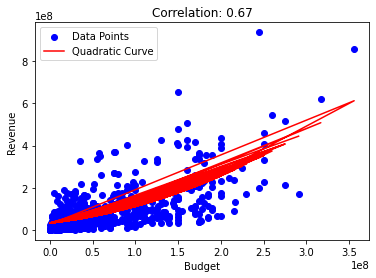

Correlation between Budget and Revenue: 0.6665081370760513


In [7]:
df_cleaned = df.dropna(subset=['Budget_x', 'domestic_revenue'])

log_budget = np.log(df_cleaned['Budget_x'])
# Calculate the correlation between 'Budget' and 'Revenue'
correlation = df_cleaned['Budget_x'].corr(df_cleaned['domestic_revenue'])

plt.scatter(df_cleaned['Budget_x'], df_cleaned['domestic_revenue'], color='blue', label='Data Points')

# Add a trendline
#plt.plot(df_cleaned['Budget_x'].values, df_cleaned['Budget_x'].values * correlation, color='red', label='Trendline')

# Fit a quadratic curve
fit = np.polyfit(df_cleaned['Budget_x'].values, df_cleaned['domestic_revenue'].values, 2)
quad_line = np.polyval(fit, df_cleaned['Budget_x'].values)

# Plot the quadratic curve
plt.plot(df_cleaned['Budget_x'].values, quad_line, color='red', label='Quadratic Curve')

# Set labels and title
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title(f'Correlation: {correlation:.2f}')

# Display legend
plt.legend()

# Show the plot
plt.show()
# Display the correlation
print(f"Correlation between Budget and Revenue: {correlation}")

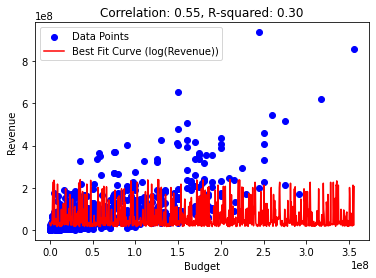

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Drop rows with missing values in 'Budget' and 'Revenue'
df_cleaned = df.dropna(subset=['Budget_x', 'domestic_revenue'])

# Take the logarithm of 'Budget' and 'Revenue'
log_revenue = np.log(df_cleaned['domestic_revenue'])

# Fit a quadratic curve to the log of budget
fit = np.polyfit(df_cleaned["Budget_x"], log_revenue, 2)
quadratic_line = np.polyval(fit, df_cleaned["Budget_x"])

# Calculate the correlation between the log of 'Budget' and log of 'Revenue'
correlation = np.corrcoef(df_cleaned["Budget_x"], log_revenue)[0, 1]

# Calculate R-squared
slope, intercept, r_value, p_value, std_err = linregress(df_cleaned["Budget_x"], log_revenue)
r_squared = r_value**2

# Plot the data points
plt.scatter(df_cleaned['Budget_x'], df_cleaned['domestic_revenue'], color='blue', label='Data Points')

# Plot the quadratic curve
budget_range = np.linspace(df_cleaned["Budget_x"].min(), df_cleaned["Budget_x"].max(), 790)
plt.plot(budget_range, np.exp(quadratic_line), color='red', label='Best Fit Curve (log(Revenue))')

# Set labels and title
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title(f'Correlation: {correlation:.2f}, R-squared: {r_squared:.2f}')

# Display legend
plt.legend()

# Show the plot
plt.show()


<AxesSubplot:xlabel='Budget_x', ylabel='domestic_revenue'>

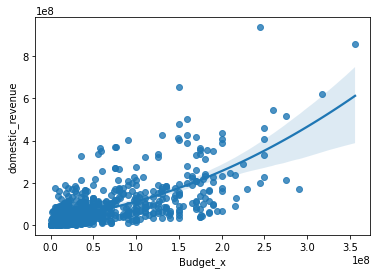

In [9]:
# Drop rows with missing values in 'Budget' and 'Revenue'
df_cleaned = df.dropna(subset=['Budget_x', 'domestic_revenue'])
sns.regplot(x=df_cleaned["Budget_x"], y=df_cleaned["domestic_revenue"],order=2)

In [10]:
tmdb_revs = df[df["Revenue_y"]!=0]

In [11]:
tmdb_revs

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Running Time,Genres,Title_x,MPAA,Domestic Distributor,Domestic Opening,Earliest Release Date,...,Revenue_y,Runtime,Title_y,movie_id,cast_ids,order,director_ids,domestic_revenue,international_revenue,worldwide_revenue
8,8,41420,41420,1 hr 49 min,Action Crime Drama Mystery Thriller,Broken City (2013),R,Twentieth Century Fox,8268908.0,"January 18, 2013 (Domestic, EMEA)",...,34737199.0,109.0,Broken City,98357,"[13240, 934, 1922, 2954, 12834, 203096, 76511,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[11448],19701164.0,15036035.0,34737199.0
51,51,41463,41463,1 hr 46 min,Biography Drama History War,"Bless Me, Ultima (2012)",PG-13,Arenas Entertainment,470109.0,"February 22, 2013 (Domestic)",...,1553826.0,106.0,"Bless Me, Ultima",164184,"[1116235, 1163, 2137, 224507, 3979, 76857, 116...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",[21712],1561962.0,1561962.0,NaN
82,82,41494,41494,1 hr 29 min,Action Adventure Comedy Horror Sci-Fi Thriller,Spiders (2013),PG-13,Millennium Entertainment,NaN,"February 8, 2013 (Domestic)",...,257019.0,89.0,Spiders,164331,"[115440, 85178, 24605, 41687, 85516, 10207, 13...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[42309],257019.0,257019.0,NaN
100,100,41512,41512,1 hr 56 min,Action Crime Drama Thriller,Out of the Furnace (2013),R,Relativity Media,5220288.0,"December 4, 2013 (Domestic)",...,15400000.0,116.0,Out of the Furnace,164457,"[3894, 8691, 57755, 9880, 5293, 2178, 1893, 46...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[65167],11330849.0,4330705.0,15661554.0
119,119,41531,41531,1 hr 32 min,Documentary Music,One Direction: This Is Us (2013),PG,TriStar Pictures,15815497.0,"August 28, 2013 (EMEA)",...,68500000.0,92.0,One Direction: This Is Us,164558,"[1052109, 1146050, 1052108, 1052107, 1052106, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[57492],28873374.0,39694467.0,68567841.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35036,35036,76809,76809,1 hr 41 min,Adventure Animation Comedy Drama Family Fantas...,Elemental (2023),PG,Walt Disney Studios Motion Pictures,29602429.0,"June 14, 2023 (APAC)",...,486797988.0,102.0,Elemental,976573,"[1087262, 1639848, 1236458, 2073564, 63234, 11...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[21198],154426697.0,336508404.0,490935101.0
35057,35057,76830,76830,1 hr 38 min,Horror,Two Witches (2021),NaN,NaN,NaN,"February 23, 2023 (Colombia)",...,537974.0,95.0,Two Witches,785759,"[2283865, 1681685, 2934926, 1070188, 1492017, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]",[2642445],537974.0,537974.0,NaN
35058,35058,76831,76831,1 hr 31 min,Horror Thriller,Consecration (2023),R,IFC Films,329951.0,"February 9, 2023 (Slovenia)",...,1504289.0,90.0,Consecration,884184,"[20089, 6413, 2170974, 67026, 95716, 2108331, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[41041],538551.0,1733518.0,2272069.0
35068,35068,76841,76841,1 hr 43 min,Comedy Romance,No Hard Feelings (2023),R,Sony Pictures Entertainment (SPE),15002770.0,"June 21, 2023 (EMEA)",...,82995526.0,104.0,No Hard Feelings,884605,"[72129, 2914688, 60034, 4756, 118752, 209087, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[84416],50452282.0,36634541.0,87086823.0


In [12]:
imdb_revs = df.dropna(subset=["domestic_revenue"])

In [13]:
imdb_revs

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Running Time,Genres,Title_x,MPAA,Domestic Distributor,Domestic Opening,Earliest Release Date,...,Revenue_y,Runtime,Title_y,movie_id,cast_ids,order,director_ids,domestic_revenue,international_revenue,worldwide_revenue
6,6,41418,41418,1 hr 22 min,Documentary Sport,Into the Mind (2013),NaN,NaN,NaN,"January 31, 2014 (Spain)",...,0.0,83.0,Into the Mind,163875,"[124065, 587712, 587879, 582159, 90226, 582154...","[0, 1, 2, 3, 4, 5, 6, 7, 8]","[112813, 590724]",2241.0,2241.0,NaN
7,7,41419,41419,8 min,History Short,In Search of Lost Time (2013),NaN,NaN,NaN,"September 30, 2007 (South Korea)",...,0.0,8.0,In Search of Lost Time,983081,[],[],[3384263],37.0,37.0,NaN
8,8,41420,41420,1 hr 49 min,Action Crime Drama Mystery Thriller,Broken City (2013),R,Twentieth Century Fox,8268908.0,"January 18, 2013 (Domestic, EMEA)",...,34737199.0,109.0,Broken City,98357,"[13240, 934, 1922, 2954, 12834, 203096, 76511,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[11448],19701164.0,15036035.0,34737199.0
29,29,41441,41441,1 hr 30 min,Drama,Redwood Highway (2013),PG-13,Monterey Media,30.0,"April 11, 2014 (Domestic)",...,0.0,90.0,Redwood Highway,262357,"[28778, 4139, 123516, 1169115, 62760, 7134, 11...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",[133426],134049.0,134049.0,NaN
51,51,41463,41463,1 hr 46 min,Biography Drama History War,"Bless Me, Ultima (2012)",PG-13,Arenas Entertainment,470109.0,"February 22, 2013 (Domestic)",...,1553826.0,106.0,"Bless Me, Ultima",164184,"[1116235, 1163, 2137, 224507, 3979, 76857, 116...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",[21712],1561962.0,1561962.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35060,35060,76833,76833,1 hr 34 min,Horror,Elevator Game (2023),NaN,NaN,NaN,"August 24, 2023 (Russia/CIS)",...,0.0,94.0,Elevator Game,1015303,"[1780952, 2511594, 2537199, 1742672, 4282938, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]",[1521437],268136.0,268136.0,NaN
35066,35066,76839,76839,1 hr 25 min,Family,"Red, White & Brass (2023)",NaN,NaN,NaN,"March 23, 2023 (New Zealand)",...,0.0,85.0,"Red, White & Brass",1081156,"[3900667, 3223391, 3999400, 3999401, 3999402, ...","[0, 1, 2, 3, 4, 5]",[2430028],864271.0,864271.0,NaN
35068,35068,76841,76841,1 hr 43 min,Comedy Romance,No Hard Feelings (2023),R,Sony Pictures Entertainment (SPE),15002770.0,"June 21, 2023 (EMEA)",...,82995526.0,104.0,No Hard Feelings,884605,"[72129, 2914688, 60034, 4756, 118752, 209087, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[84416],50452282.0,36634541.0,87086823.0
35069,35069,76842,76842,1 hr 36 min,Drama,The Integrity of Joseph Chambers (2022),NaN,NaN,NaN,"July 6, 2023 (Netherlands)",...,0.0,96.0,The Integrity of Joseph Chambers,950161,"[59671, 22123, 53259, 47296, 2176925, 1922620,...","[0, 1, 2, 3, 4, 5, 6, 7]",[1141753],5206.0,5206.0,NaN


In [14]:
tmdb_with_no_imdb_rev = list(set(tmdb_revs["IMDB ID"]).difference(set(imdb_revs["IMDB ID"])))


In [15]:
# Creating a DataFrame from the list
# Filtering rows from tmdb DataFrame based on tmdb_with_no_imdb_rev
filtered_tmdb = tmdb_revs[tmdb_revs['IMDB ID'].isin(tmdb_with_no_imdb_rev)]
df_to_save = filtered_tmdb[["IMDB ID", "Revenue_y", "Running Time", "Title_x"]]

# Specifying the CSV file path
csv_file_path = 'tmdb_no_imdb_revenues.csv'

# Writing the filtered DataFrame to a CSV file
df_to_save.to_csv(csv_file_path, index=False)

print(f'The relevant rows have been stored in {csv_file_path}')

The relevant rows have been stored in tmdb_no_imdb_revenues.csv


In [16]:
for id in tmdb_with_no_imdb_rev:
    print(id)

tt2133234
tt8235660
tt3454030
tt2606292
tt3139086
tt8190662
tt5939404
tt3280262
tt4935782
tt11416992
tt2312390
tt2872810
tt3635920
tt5051948
tt6986718
tt5124206
tt15387654
tt3868708
tt15501758
tt14221050
tt13289298
tt3811916
tt2943992
tt2384022
tt4232188
tt8840490
tt13460398
tt6545212
tt28197460
tt7650604
tt26908259
tt5701718
tt7449924
tt5164184
tt3215220
tt4608574
tt10250846
tt3067166
tt3533612
tt8876008
tt3902120
tt7613260
tt6147458
tt17071130
tt7970690
tt2298224
tt22003732
tt2857196
tt8607728
tt8259442
tt10555920
tt3289194
tt4892424
tt18548612
tt22042944
tt1070874
tt8970866
tt9460462
tt12649538
tt10140666
tt3499632
tt10687574
tt8657692
tt10618286
tt14414730
tt6571500
tt1986850
tt5152640
tt1673732
tt3701784
tt5113086
tt7938472
tt4266692
tt11502850
tt2230358
tt7131678
tt3170972
tt16255314
tt11341572
tt19402216
tt10670200
tt7869070
tt1068953
tt19878566
tt2337650
tt3733958
tt28668969
tt5945888
tt5855378
tt3848268
tt2627434
tt2650480
tt4145848
tt7921182
tt2953170
tt2338251
tt2243900
tt14

In [17]:
len(set(imdb_revs["IMDB ID"]).difference(set(tmdb_revs["IMDB ID"])))

3797

In [18]:
len(set(imdb_revs["IMDB ID"]).intersection(set(tmdb_revs["IMDB ID"])))

2512

In [19]:
len(set(tmdb_revs["IMDB ID"]).difference(set(imdb_revs["IMDB ID"])))

118

# Lucas Update: Get Revenues for 2011-2012 Data

In [13]:
df = pd.read_csv("2011-2012 Data/merged_2011_2012_data.csv")

In [14]:
# Create a new column for domestic revenue
df['domestic_revenue'] = df['Revenue_x'].apply(extract_domestic_revenue)
df["international_revenue"] =  df['Revenue_x'].apply(extract_international_revenue)
df["worldwide_revenue"] =  df['Revenue_x'].apply(extract_worldwide_revenue)

df = df.drop('Revenue_x', axis=1)
df.to_csv("merged_2011_2012_data_with_revenues.csv")

# Lucas Update: Get Revenues for 2010 Data

In [3]:
df = pd.read_csv("2010/merged_data_2010_with_release_years.csv")

In [6]:
# Create a new column for domestic revenue
df['domestic_revenue'] = df['Revenue_x'].apply(extract_domestic_revenue)
df["international_revenue"] =  df['Revenue_x'].apply(extract_international_revenue)
df["worldwide_revenue"] =  df['Revenue_x'].apply(extract_worldwide_revenue)

df = df.drop('Revenue_x', axis=1)
df.to_csv("merged_2010_data_with_revenues_with_release_years.csv")